---
date: 2022-10-04
title: Wraparound in Kwant
date-format: short
---

In [ ]:
import kwant
from matplotlib import pyplot as plt
import tinyarray as ta
import numpy as np
import scipy.sparse.linalg as sla
import scipy
from kwant.wraparound import wraparound as wrpa

In [4]:
def make_system(params=dict(t=1.0), L=51, W=51):
    lat = kwant.lattice.square(1)
    sym = kwant.TranslationalSymmetry(lat.vec((0, W)))
    syst = kwant.Builder(sym)

    def hopping(sitei, sitej, t):
        xt, yt = sitei.pos
        xs, ys = sitej.pos
        return -t

    def onsite(site, t):
        (x, y) = site.pos
        return 4 * t

    def central_region(pos):
        x, y = pos
        return x < L and x >= 0 and y < W and y >= 0

    syst[lat.shape(central_region, (0, 0))] = onsite
    syst[lat.neighbors(1)] = hopping

    syst = wrpa(syst)

    def lead_shape(pos):
        x, y = pos
        return y < W and y >= 0

    # sym=kwant.TranslationalSymmetry((-1, 0))
    # lead = kwant.Builder(sym)
    # lead[lat.shape(lead_shape, (0,0))] = onsite
    # lead[lat.neighbors()] = hopping

    # lead_n_f=lead.finalized()

    # kwant.plotter.bands(lead_n_f, show=False)
    # plt.xlabel("momentum [(lattice constant)^-1]")
    # plt.ylabel("energy [t]")
    # plt.show()

    sym = kwant.TranslationalSymmetry((-1, 0), (0, W))
    lead = kwant.Builder(sym)
    lead[lat.shape(lead_shape, (0, 0))] = onsite
    lead[lat.neighbors()] = hopping

    lead = wrpa(lead, keep=0)

    lead_f = lead.finalized()

    #### Attach the leads and return the finalized system. ####
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())

    return syst.finalized(), lead_f

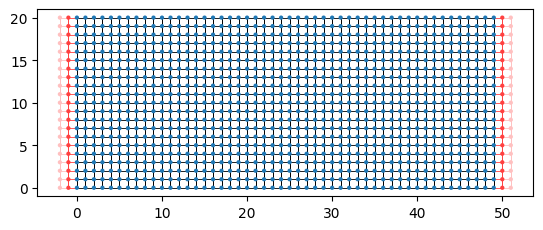

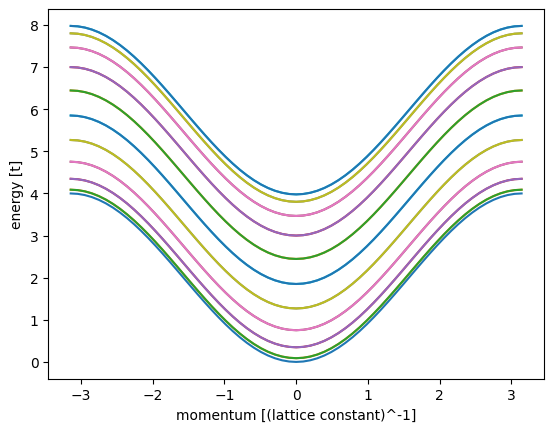

In [6]:
def plot_density(sys, ener, params, it=-1):
    t = params["t"]
    wf = kwant.solvers.default.wave_function(sys, energy=2.0, params=params)
    kwant.plotter.map(sys, np.abs(wf(0)[0]) ** 2, fig_size=(8, 5))


def main(t):
    sys = make_system(params=dict(t=1, ky=1), L=51, W=21)
    plot_density(sys, 1, params=dict(t=1, ky=0))


sys, lead = make_system(params=dict(t=1), L=50, W=21)
kwant.plot(sys)
kwant.plotter.bands(lead, params=dict(t=1, k_y=0), show=False)
plt.xlabel("momentum [(lattice constant)^-1]")
plt.ylabel("energy [t]")
plt.show()